<a href="https://colab.research.google.com/github/Lis30/Homeworks/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_3_2_%D0%9A%D0%B0%D1%80%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

1) Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'. Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [1]:
names_list = ['Name1 Surname1', 'Name2 Surname2', 'Name3 Surname3', 'Name4 Surname4']
names_list

['Name1 Surname1', 'Name2 Surname2', 'Name3 Surname3', 'Name4 Surname4']

2) В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием)<br>
Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35

![[Eground.pro] task2.png](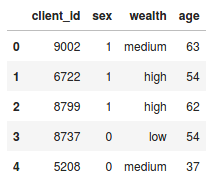)

In [ ]:
medium_35 = df.equals('wealth == "medium" and age > 35')

3) Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант task3.png (находится в папке с заданием)<br>
Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)<br>
Note: колонка называется Клиент id - шрифт плохо передаёт кейс i в id

![[Eground.pro] task3.png](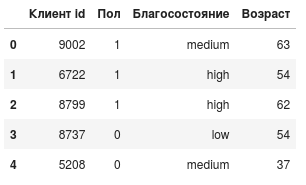)

In [ ]:
df = df.rename(columns = {'Клиент Id': 'klient_id', 'Пол': 'sex', 'Благосостояние': 'welfare', 'Возраст': 'age'})

4)Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)

In [ ]:
df['older_than_30'] = (df.age > 30)

5) А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [ ]:
unique_num = {df.apply(lambda col: col.unique())}

6) У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png<br>
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)

![[Eground.pro] task6.png](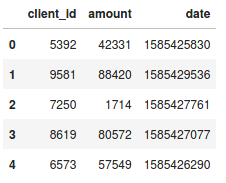)

In [ ]:
full_data = df.merge(data, on = 'client_id')

7)💀 Сложное задание! 💀<br>
А теперь создадим свою собственную функцию!<br>
Напишите функцию read_n_agg, которая <br>
- принимает на вход один параметр – путь к файлу<br>
- считывает переданный файл, в котором разделителем является ;<br>
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)<br>
- возвращает результат этих действий (агрегированный датафрэйм)<br>
Данные выглядят как в task7.png, датасэт в файле companies.csv


![[Eground.pro] task7.png](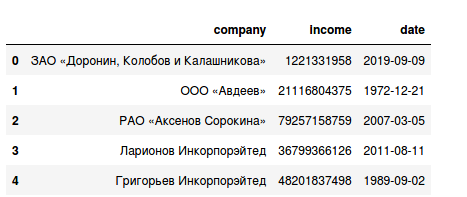)

In [ ]:
def read_n_agg(way):
    file = pd.read_csv('way', sep = ';')
    agg_file = file.groupby('company').agg({'income': 'mean'})
    return agg_file

8) Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!<br>
journey_id – уникальный id поездки<br>
user_id – id пользователя<br>
driver_id – id водителя<br>
taxi_id – id машины<br>
icon – тип поездки<br>
start_type – тип заказа (asap, reserved, delayed)<br>
start_at – время начала поездки<br>
start_lat – исходное местоположение пользователя, широта<br>
start_lon – исходное местоположение пользователя, долгота<br>
end_at – время окончания поездки<br>
end_lat – итоговое местоположение, широта<br>
end_lon – итоговое местоположение, долгота<br>
end_state – состояние заказа<br>
driver_start_lat – исходное местоположение водителя, широта<br>
driver_start_lon – исходное местоположение водителя, долгота<br>
arrived_at – время прибытия водителя<br>
source – платформа, с которой сделан заказ<br>
driver_score – оценка водителя клиентом<br>
rider_score – оценка клиента водителем<br>
Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.
Может пригодиться: read_csv()<br>
Датасет для задания: taxi_peru.csv (в папке).

In [6]:
taxi = pd.read_csv('taxi_peru.csv', sep = ';')

In [11]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

9) Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [19]:
sources = taxi.groupby('source').agg({'journey_id': 'count'})
sourses = sources.rename(columns = {'journey_id': 'journey_count'})
sourses

,journey_count
source,
Android,4909
Wap,136
iPad,571
iPhone,9741
web,7631


In [ ]:
total_journey = sourses.agg({'journey_count': 'sum'})

In [34]:
sourses['persent'] = sourses.journey_count.\
                            apply(lambda x: round(x * 100 / total_journey, 0))
sourses.sort_values('persent', ascending=False).head(1)

,journey_count,persent
source,,
iPhone,9741,42.0


10) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:<br>
- Посчитайте частоту встречаемости каждой из оценок<br>
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))<br>
- Сбросьте индексы<br>
- Переименуйте колонки в driver_score и percentage<br>
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)<br>
- Запишите результат в driver_score_counts<br>
Полезные функции:<br>
.mul() – умножение, более удобный вариант для использования в цепочке методов<br>
.round() – округление<br>
.reset_index() – сбросить индекс<br>
.value_counts() – сколько раз встречается каждое значение переменной<br>

In [113]:
score_count = taxi.groupby('driver_score', as_index=False).agg({'journey_id': 'count'})
score_count = score_count.rename(columns={'journey_id':'score'})
score_count

,driver_score,score
0,0.0,1094
1,1.0,94
2,2.0,62
3,3.0,227
4,4.0,1674
5,5.0,4499


In [98]:
total_score = taxi.driver_score.count()
total_score

7650

In [117]:
score_count['persent'] = score_count.apply(lambda x: x['score']/total_score, axis=1)
score_count['percentage'] = score_count.agg({'persent': '{:,.0%}'.format})
score_count['persent'] = round(score_count['persent']*100, 0)
score_count

,driver_score,score,persent,percentage
0,0.0,1094,14.0,14%
1,1.0,94,1.0,1%
2,2.0,62,1.0,1%
3,3.0,227,3.0,3%
4,4.0,1674,22.0,22%
5,5.0,4499,59.0,59%


11) Теперь строим график! (task11.png) Сначала импортируем библиотеки:<br>
import seaborn as sns<br>
import matplotlib.pyplot as plt<br>
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:<br>
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)<br>
ax.set(xlabel='Driver score', ylabel='Percentage')<br>
sns.despine()  # убрать часть рамки графика<br>
plt.show()

![[Eground.pro] task11.jpg](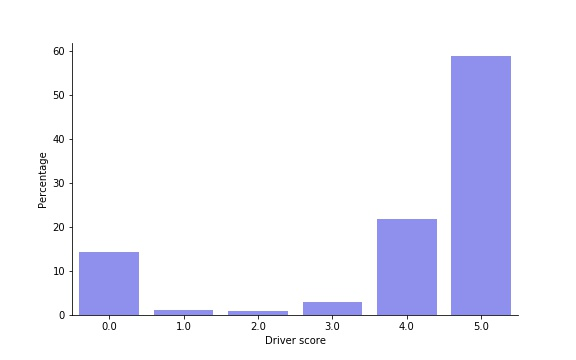)

<ipython-input-120-dc8bef06f44c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(score_count, x='driver_score', y='persent', ci= None, color='blue', alpha=0.5)


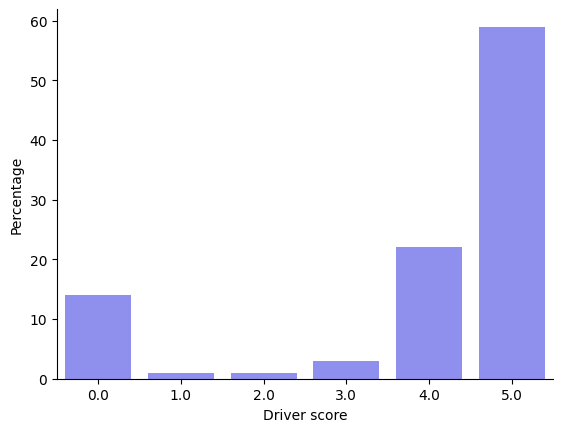

In [120]:
ax = sns.barplot(score_count, x='driver_score', y='persent', ci= None, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() # убрать часть рамки графика
plt.show()

12) 💀 Сложное задание! 💀
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?


In [123]:
drive_score_count = taxi.groupby('rider_score', as_index=False).agg({'journey_id': 'count'})
drive_score_count = drive_score_count.rename(columns={'journey_id':'score'})
drive_score_count

,rider_score,score
0,0.0,352
1,1.0,32
2,2.0,30
3,3.0,213
4,4.0,1359
5,5.0,13404


In [122]:
total_score = taxi.rider_score.count()
total_score

15390

In [125]:
drive_score_count['persent'] = drive_score_count.apply(lambda x: x['score']/total_score, axis=1)
drive_score_count['percentage'] = drive_score_count.agg({'persent': '{:,.0%}'.format})
drive_score_count['persent'] = round(drive_score_count['persent']*100, 0)
drive_score_count

,rider_score,score,persent,percentage
0,0.0,352,2.0,2%
1,1.0,32,0.0,0%
2,2.0,30,0.0,0%
3,3.0,213,1.0,1%
4,4.0,1359,9.0,9%
5,5.0,13404,87.0,87%


<ipython-input-126-a7cef4ca4e56>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(drive_score_count, x='rider_score', y='persent', ci= None, color='blue', alpha=0.5)


<Axes: xlabel='rider_score', ylabel='persent'>

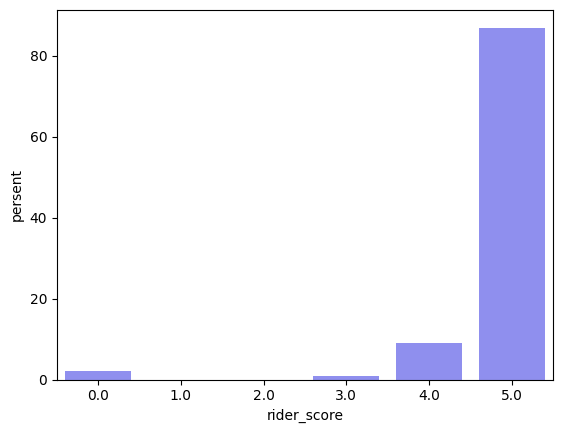

In [126]:
sns.barplot(drive_score_count, x='rider_score', y='persent', ci= None, color='blue', alpha=0.5)

Водители чаще ставят посажирам пятёрки и почти никогда 0, тогда как пассажиры в 14% случаев поставили отметку 0